In [3]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import GridEnv
from sac_disc import SAC
from policy_net import PolicyNetwork
from q_net import QNetwork

from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

In [2]:
MAZE = np.array([
    [ 1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  0.],
    [ 0.,  0.,  1.,  1.],
    [ 1.,  0.,  1.,  0.],
])

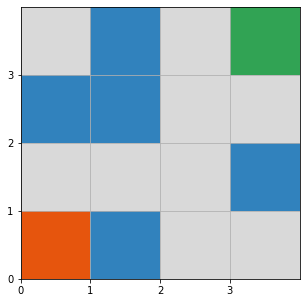

In [3]:
env = GridEnv(
    maze=MAZE.copy(),
    is_stochastic=False,
    action_transitions={
        'w': 1,
        's': 1,
        'd': 1,
        'a': 1,
    },
    max_timesteps=200,
    full_state=True,
)

In [4]:
sac = SAC(
    env=env,
    name='maze',
    input_dim=env.n_states,
    log_freq=20,
    load_mdls=False,
    hyprprms={
        'mem_sz': 2500,
        'bth_sz': 500,
        'critic_sync_f': 2,
    }
)

In [5]:
sac.run(1000)

collecting experience...
0..20..40..Episode: 60, Reward: -194.5, Avg. Reward: -287.63400000000024, Policy Loss=-4.21
Episode: 80, Reward: -127.05000000000001, Avg. Reward: -243.63800000000015, Policy Loss=-5.08
Episode: 100, Reward: -34.500000000000014, Avg. Reward: -178.21200000000005, Policy Loss=-6.58
Episode: 120, Reward: -42.65, Avg. Reward: -274.19000000000017, Policy Loss=-5.38
Episode: 140, Reward: -306.30000000000007, Avg. Reward: -298.8800000000001, Policy Loss=-3.16
Episode: 160, Reward: -41.949999999999996, Avg. Reward: -180.14600000000002, Policy Loss=-3.3
Episode: 180, Reward: -169.1999999999994, Avg. Reward: -116.6189999999999, Policy Loss=-22.04
Episode: 200, Reward: -169.1999999999994, Avg. Reward: -168.2039999999996, Policy Loss=-2.36
Episode: 220, Reward: -169.1999999999994, Avg. Reward: -169.18399999999937, Policy Loss=-2.99
Episode: 240, Reward: -169.1999999999994, Avg. Reward: -169.1999999999994, Policy Loss=-3.06
Episode: 260, Reward: -169.1999999999994, Avg. Rew

In [6]:
sac.evaluate()

#### Training

Text(0.5, 1.0, 'Average reward per episode')

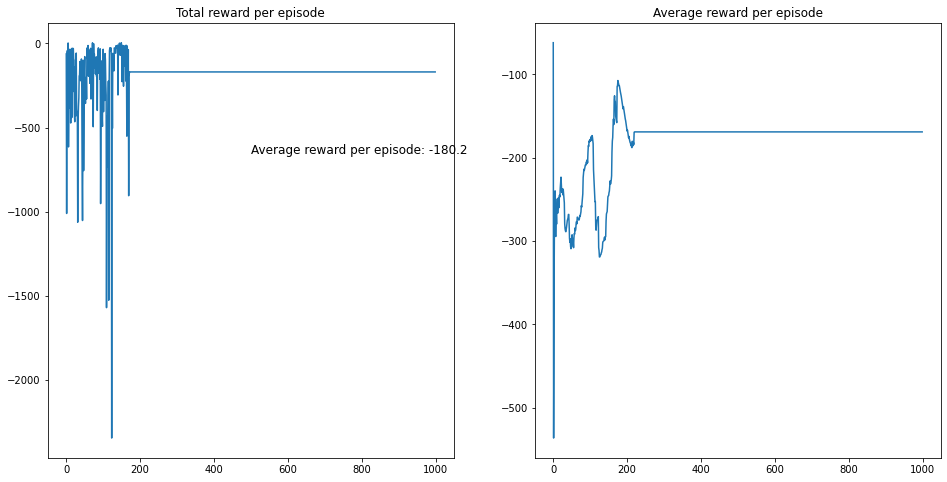

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

total_rewards = [log['reward'] for _, log in sac.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0].plot(range(len(total_rewards)), total_rewards)
ax[0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0].transAxes, size='large')
ax[0].set_title('Total reward per episode')

cumulative_rewards = [log['avg_reward'] for _, log in sac.logs.items()]
ax[1].plot(range(len(total_rewards)), cumulative_rewards)
ax[1].set_title('Average reward per episode')

### Evaluation

Text(0.5, 1.0, 'Total reward per episode')

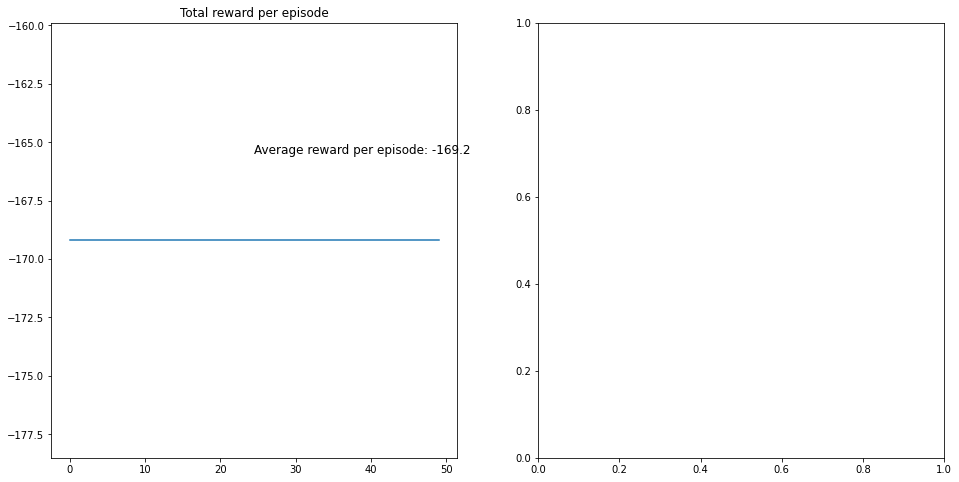

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

total_rewards = [log['reward'] for _, log in sac.eval_logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0].plot(range(50), total_rewards)
ax[0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0].transAxes, size='large')
ax[0].set_title('Total reward per episode')